# Let's listify the contents
what_were_covering = [
    "0. An end-to-end Scikit-Learn workflow",
    "1. Getting the data ready",
    "2. Choose the right estimator/algorithm for our problems",
    "3. Fit the model/algorithm and use it to make predictions on our data",
    "4. Evaluating a mcodel",
    "5. Improve a model",
    "6. Save and load a trained model",
    "7. Putting it all tgether!"]

In [1]:
# Import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


## 0. End-to-end Sklearn workflow

In [2]:
# 1. Getting the data
heart_disease = pd.read_csv("heart-disease.csv")
heart_disease

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [3]:
# Create X axis
X = heart_disease.drop(["target"],axis=1)

# Create Y axis
Y = heart_disease["target"]

In [4]:
# 2. Choose the right model and hyperparameters
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()

# We'll keep the default hyperparameters
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [5]:
# 3.Fit the model into training data
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2)

In [6]:
clf.fit(X_train, Y_train)

RandomForestClassifier()

In [7]:
y_preds = clf.predict(X_test)
y_preds

array([0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1], dtype=int64)

In [8]:
# 4. Evaluate the model on the training and test dataset
clf.score(X_train,Y_train)

1.0

In [9]:
clf.score(X_test,Y_test)

0.7704918032786885

In [10]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(classification_report(Y_test, y_preds))

              precision    recall  f1-score   support

           0       0.79      0.68      0.73        28
           1       0.76      0.85      0.80        33

    accuracy                           0.77        61
   macro avg       0.77      0.76      0.77        61
weighted avg       0.77      0.77      0.77        61



In [11]:
confusion_matrix(Y_test, y_preds)

array([[19,  9],
       [ 5, 28]], dtype=int64)

In [12]:
accuracy_score(Y_test, y_preds)

0.7704918032786885

In [13]:
# 5. Improve a model
# Try a different amount of n_estimator
np.random.seed(42)
for i in range(10,100,10):
    print(f"trying with {i} estimators...")
    clf =RandomForestClassifier(n_estimators=i).fit(X_train,Y_train)
    print(f"Model accuracy on test set: {clf.score(X_test, Y_test)*100:.2f}%")
    print("")

trying with 10 estimators...
Model accuracy on test set: 80.33%

trying with 20 estimators...
Model accuracy on test set: 77.05%

trying with 30 estimators...
Model accuracy on test set: 80.33%

trying with 40 estimators...
Model accuracy on test set: 80.33%

trying with 50 estimators...
Model accuracy on test set: 77.05%

trying with 60 estimators...
Model accuracy on test set: 83.61%

trying with 70 estimators...
Model accuracy on test set: 78.69%

trying with 80 estimators...
Model accuracy on test set: 77.05%

trying with 90 estimators...
Model accuracy on test set: 78.69%



In [14]:
# 6. Load and save a model
# wb = write binary
import pickle

pickle.dump(clf, open("random_forest_model_1.pkl","wb"))

In [15]:
# rb = read binary
loaded_model = pickle.load(open("random_forest_model_1.pkl","rb"))

# Loaded model will show the last test results from the existing model
loaded_model.score(X_test, Y_test)

0.7868852459016393

In [16]:
import sklearn
sklearn.show_versions()


System:
    python: 3.12.4 | packaged by Anaconda, Inc. | (main, Jun 18 2024, 15:03:56) [MSC v.1929 64 bit (AMD64)]
executable: C:\Users\muhammad.rahman\Desktop\sample_project_1\env\python.exe
   machine: Windows-11-10.0.22631-SP0

Python dependencies:
      sklearn: 1.4.2
          pip: 24.0
   setuptools: 69.5.1
        numpy: 1.26.4
        scipy: 1.13.1
       Cython: None
       pandas: 2.2.2
   matplotlib: 3.8.4
       joblib: 1.4.2
threadpoolctl: 3.5.0

Built with OpenMP: True

threadpoolctl info:
       user_api: blas
   internal_api: mkl
    num_threads: 4
         prefix: mkl_rt
       filepath: C:\Users\muhammad.rahman\Desktop\sample_project_1\env\Library\bin\mkl_rt.2.dll
        version: 2023.1-Product
threading_layer: intel

       user_api: openmp
   internal_api: openmp
    num_threads: 8
         prefix: vcomp
       filepath: C:\Users\muhammad.rahman\Desktop\sample_project_1\env\vcomp140.dll
        version: None


## 1. Getting our data ready to be used with machine learning
Three main things we have to do: 1. Split the data into features and labels (usually X & y) 2. Filling (also called imputing) or disregarding missing values 3. Converting non-numerical values to numerical values (also called feature encoding)

In [17]:
heart_disease

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [18]:
X = heart_disease.drop(["target"],axis=1)

In [19]:
y = heart_disease["target"]

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

## 1.1 Make it all numerical

In [21]:
car_sales = pd.read_csv("car-sales-extended.csv")
car_sales

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431,4,15323
1,BMW,Blue,192714,5,19943
2,Honda,White,84714,4,28343
3,Toyota,White,154365,4,13434
4,Nissan,Blue,181577,3,14043
...,...,...,...,...,...
995,Toyota,Black,35820,4,32042
996,Nissan,White,155144,3,5716
997,Nissan,Blue,66604,4,31570
998,Honda,White,215883,4,4001


In [22]:
from sklearn.model_selection import train_test_split
# Get the data
X = car_sales.drop(["Price"],axis = 1)
y = car_sales["Price"]

# Split the data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [23]:
# Build a machine learning model
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
model.fit(X_train, y_train)
model.score(X_test,y_test)

ValueError: could not convert string to float: 'Toyota'

In [ ]:
# Turn the categories into numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot",
                                  one_hot,
                                  categorical_features
                                 )],remainder="passthrough")
transformed_X = transformer.fit_transform(X)
transformed_X


In [ ]:
pd.DataFrame(transformed_X)

In [ ]:
X

In [ ]:
import pandas as pd
dummies = pd.get_dummies(car_sales[["Make", "Colour", "Doors"]]).astype(int)
dummies

In [24]:
# Refit the model
np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(transformed_X, y, test_size=0.2)

model.fit(X_train,y_train)
model.score(X_test, y_test)

NameError: name 'transformed_X' is not defined

 ## 1.2 what if there are missing values

In [ ]:
car_sales_missing = pd.read_csv("car-sales-extended-missing-data.csv")
car_sales_missing.isna().sum()

In [ ]:
X = car_sales_missing.drop(["Price"],axis=1)
y = car_sales_missing["Price"]

In [25]:
# Turn the categories into numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot",
                                  one_hot,
                                  categorical_features
                                 )],remainder="passthrough")
transformed_X = transformer.fit_transform(X)
transformed_X

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 3.54310e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        1.00000e+00, 1.92714e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 8.47140e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 6.66040e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.15883e+05],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.48360e+05]])

In [26]:
# Filling the missing data
car_sales_missing["Make"].fillna("missing",inplace = True)
car_sales_missing["Colour"].fillna("missing",inplace = True)
car_sales_missing["Odometer (KM)"].fillna(car_sales_missing["Odometer (KM)"].mean(),inplace = True)
car_sales_missing["Doors"].fillna(4,inplace = True)

NameError: name 'car_sales_missing' is not defined

In [27]:
car_sales_missing.isna().sum()

NameError: name 'car_sales_missing' is not defined

In [28]:
# Remove rows with missing Price value
car_sales_missing.dropna(inplace=True)

NameError: name 'car_sales_missing' is not defined

In [31]:
car_sales_missing.isna().sum()

NameError: name 'car_sales_missing' is not defined

In [32]:
X = car_sales_missing.drop(["Price"],axis = 1)
y = car_sales_missing["Price"]

NameError: name 'car_sales_missing' is not defined

In [33]:
# Turn the categories into numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot",
                                  one_hot,
                                  categorical_features
                                 )],remainder="passthrough")
transformed_X = transformer.fit_transform(car_sales_missing)
transformed_X

NameError: name 'car_sales_missing' is not defined

## Option 2: Filling missing values with Sklearn

In [34]:
car_sales_missing = pd.read_csv("car-sales-extended-missing-data.csv")
car_sales_missing.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


In [35]:
car_sales_missing.dropna(subset = ["Price"],inplace = True)
car_sales_missing.isna().sum()

Make             47
Colour           46
Odometer (KM)    48
Doors            47
Price             0
dtype: int64

In [36]:
X = car_sales_missing.drop("Price",axis =1)
y = car_sales_missing["Price"]

In [37]:
# Fill missing values with sklearn
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

# Fill categorical values with "Missing" and numerical values with mean
cat_imputer = SimpleImputer(strategy="constant",fill_value="missing")
door_imputer = SimpleImputer(strategy="constant",fill_value=4)
num_imputer = SimpleImputer(strategy="mean")

# Define columns
cat_feature = ["Make", "Colour"]
door_feature = ["Doors"]
num_feature = ["Odometer (KM)"]

# Create an imputer (something that fills missing data)
imputer = ColumnTransformer([
    ("cat_imputer",cat_imputer, cat_feature),
    ("door_imputer", door_imputer, door_feature),
    ("num_imputer", num_imputer, num_feature)
])

# Transform the data
filled_X = imputer.fit_transform(X)
filled_X

array([['Honda', 'White', 4.0, 35431.0],
       ['BMW', 'Blue', 5.0, 192714.0],
       ['Honda', 'White', 4.0, 84714.0],
       ...,
       ['Nissan', 'Blue', 4.0, 66604.0],
       ['Honda', 'White', 4.0, 215883.0],
       ['Toyota', 'Blue', 4.0, 248360.0]], dtype=object)

In [38]:
car_sales_filled = pd.DataFrame(filled_X,columns=["Make","Colour","Doors","Odometer (KM)"])
car_sales_filled.isna().sum()

Make             0
Colour           0
Doors            0
Odometer (KM)    0
dtype: int64

In [39]:
# Turn the categories into numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot",
                                  one_hot,
                                  categorical_features
                                 )],remainder="passthrough")
transformed_X = transformer.fit_transform(car_sales_filled)
transformed_X

<950x15 sparse matrix of type '<class 'numpy.float64'>'
	with 3800 stored elements in Compressed Sparse Row format>

In [40]:
# Fit a model
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(transformed_X, y, test_size=0.2)

model = RandomForestRegressor()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.2871909516296761

## 2. Choosing the right estimator/algorithm

Some things to note:
* Sklearn refers to machine learning models, algorithms as estimators
* Classification problem - predicting a category (heart disease or not)
      * sometimes we'll see 'clf' (short for classifier) used as classification estimator
* Regression problem - predicting a number (selling price of a car)

* How to choose what models to use https://scikit-learn.org/stable/machine_learning_map.html

## 2.1 Regression problem
California Housing dataset: https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_california_housing.html

In [32]:
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()
housing

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [33]:
housing_df = pd.DataFrame(housing["data"], columns=housing["feature_names"])
housing_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [43]:
housing_df["target"] = housing["target"]
housing_df = housing_df.drop("MedHouseVal",axis=1)
housing_df

KeyError: "['MedHouseVal'] not found in axis"

In [34]:
# Import algorithm
from sklearn.linear_model import Ridge

# Setup random seed
np.random.seed(42)

# Create the data
X = housing_df.drop("target", axis = 1)
y = housing_df["target"]

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

# Fit the model into the training set
model = Ridge()
model.fit(X_train, y_train)

# Check the score of the model (test set)
model.score(X_test, y_test)

KeyError: "['target'] not found in axis"

In [ ]:
# Try another model to improve the results
from sklearn.ensemble import RandomForestRegressor

# Setup random seed
np.random.seed(42)

# Create the data
X = housing_df.drop("target", axis = 1)
y = housing_df["target"]

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

# Fit the model into the training set
model = RandomForestRegressor()
model.fit(X_train, y_train)

# Check the score of the model (test set)
model.score(X_test, y_test)


## 2.2 Picking a machine learning model for a classification problem

In [ ]:
heart_disease

## From the map, try to apply linearSVC

In [ ]:

# Import the LinearSVC estimator class
from sklearn.svm import LinearSVC

# Setup random seed
np.random.seed(42)

# Make the data
X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instantiate LinearSVC
clf = LinearSVC(max_iter=10000)
clf.fit(X_train, y_train)

# Evaluate the LinearSVC
clf.score(X_test, y_test)

In [ ]:
# Try another model (Classifier)
# Import the RandomForestClassifier estimator class
from sklearn.ensemble import RandomForestClassifier

# Setup random seed
np.random.seed(42)

# Make the data
X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instantiate Random Forest Classifier
clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train, y_train)

# Evaluate the Random Forest Classifier
clf.score(X_test, y_test)

## 3. Fit the model/alogrithm on our data and use it to make predictions

### 3.1 Fitting the model into the data

Different names for :
* x = features, features variables, data
* y = labels, targets, target variable

In [83]:
# Import the RandomForestClassifier estimator class
from sklearn.ensemble import RandomForestClassifier

# Setup random seed
np.random.seed(42)

# Make the data
X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instantiate Random Forest Classifier
clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train, y_train)

# Evaluate the Random Forest Classifier
clf.score(X_test, y_test)

0.8524590163934426

In [84]:
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


## 3.2 Making predictions using a machine learning model
2 ways to make predictions:
* '
predict'(* ')
predict_prob'a()

In [86]:
# Use a trained model to make predictions
clf.predict(np.array([1, 7, 8, 3, 4])) # this doesn't work...

C:\Users\muhammad.rahman\Desktop\sample_project_1\env\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


ValueError: Expected 2D array, got 1D array instead:
array=[1. 7. 8. 3. 4.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [87]:
X_test.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
179,57,1,0,150,276,0,0,112,1,0.6,1,1,1
228,59,1,3,170,288,0,0,159,0,0.2,1,0,3
111,57,1,2,150,126,1,1,173,0,0.2,2,1,3
246,56,0,0,134,409,0,0,150,1,1.9,1,2,3
60,71,0,2,110,265,1,0,130,0,0.0,2,1,2


In [89]:
clf.predict(X_test)

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [90]:
np.array(y_test)

array([0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [92]:
# compare predictions to truth labels to evaluate the model
y_pred = clf.predict(X_test)
np.mean(y_pred == y_test)

0.8524590163934426

In [93]:
# same thing as
clf.score(X_test, y_test)

0.8524590163934426

In [94]:
# another way to find the score
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.8524590163934426

### Make predictions with proba()

In [100]:
# predict_proba() returns probabilities of a classification label
clf.predict_proba(X_test[:5])

array([[0.89, 0.11],
       [0.49, 0.51],
       [0.43, 0.57],
       [0.84, 0.16],
       [0.18, 0.82]])

In [97]:
# using predict() on the same data
clf.predict(X_test[:5])

array([0, 1, 1, 0, 1], dtype=int64)

predict_proba() returns an ndarry of what might be the score, on the other hand predict() returns the final output of the score

## Using predict() as a regression models

In [102]:
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [108]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

np.random.seed(42)

X = housing_df.drop("target",axis=1)
y = housing_df["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = RandomForestRegressor()

model.fit(X_train,y_train)

y_pred = model.predict(X_test)
y_pred

array([0.49384  , 0.75494  , 4.9285964, ..., 4.8363785, 0.71782  ,
       1.67901  ])

In [109]:
len(y_pred)

4128

In [111]:
y_pred[:10]

array([0.49384  , 0.75494  , 4.9285964, 2.54316  , 2.33176  , 1.6525301,
       2.34323  , 1.66182  , 2.47489  , 4.8344779])

In [113]:
np.array(y_test[:10])

array([0.477  , 0.458  , 5.00001, 2.186  , 2.78   , 1.587  , 1.982  ,
       1.575  , 3.4    , 4.466  ])

In [114]:
# y_pred and y_test has the same data length
# Compare the predictions to the truth (y_test) using regression evaluation metrics
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_pred,y_test)

0.32659871732073664

## 4. Evaluating a machine learning model

Reference: https://scikit-learn.org/stable/modules/model_evaluation.html

### 4.1 Evaluation a model with the score() method

In [117]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

np.random.seed(42)

# Create X & y
X = heart_disease.drop("target",axis=1)
y = heart_disease["target"]

# Create train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Create classifier model instance
clf = RandomForestClassifier()

# Fit classifier into the data
clf.fit(X_train, y_train)

RandomForestClassifier()

In [119]:
clf.score(X_train, y_train)

1.0

In [120]:
clf.score(X_test, y_test)

0.8524590163934426

## Using the score() method on a regression problem

In [123]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

np.random.seed(42)

X = housing_df.drop("target",axis=1)
y = housing_df["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = RandomForestRegressor()
model.fit(X_train,y_train)
model.score(X_test,y_test)

0.8065734772187598

In [124]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X = heart_disease.drop("target",axis=1)
y = heart_disease["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

clf = RandomForestClassifier()
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.8524590163934426

In [126]:
cross_val_score(clf, X, y)

array([0.81967213, 0.86885246, 0.81967213, 0.78333333, 0.76666667])

In [128]:
np.random.seed(42)

# Single training and test split score
clf_single_score = clf.score(X_test, y_test)

# take the mean of 5-fold cross-validation score
clf_cross_val_score = np.mean(cross_val_score(clf, X, y, cv = 5))

# Compare the two
clf_single_score, clf_cross_val_score

(0.8524590163934426, 0.8248087431693989)

### 4.2.1 Classification model evaluation metrics
1. Accuracy
2. Area under ROC curve
3. Confusion matrix
4. Classification matrix

*Accuracy*

In [132]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X = heart_disease.drop("target",axis=1)
y = heart_disease["target"]

clf = RandomForestClassifier()
cross_val_score = cross_val_score(clf, X, y, cv=5)

In [133]:
np.mean(cross_val_score)

0.8248087431693989

In [136]:
print(f"Heart Disease Classifier Cross-Validation Accuracy: {np.mean(cross_val_score) * 100:.2f}%")

Heart Disease Classifier Cross-Validation Accuracy: 82.48%


** Area under the receiver operating characteristic curve (AUC/ROC)**
* Area Under Curve (AUC)
* ROC Curve

  ROC curves are a comparison of a model's true positive rate (tpr) versus a models false positive rate (fpr)
  * True Positive = model predicts 1 when truth is 1
  * False Positive = model predicts 1 when truth is 0
  * True Negative = model predicts 0 when truth is 0
  * False Negative = model predicts 0 when truth is 1

In [137]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [140]:
from sklearn.metrics import roc_curve

# Fit the classifier
clf.fit(X_train, y_train)

# Make predictions with probabilities
y_probs = clf.predict_proba(X_test)
y_probs[:10]

# The array below means the left side represent TP (1) and the right side represent FP (0)

array([[0.58, 0.42],
       [0.16, 0.84],
       [0.49, 0.51],
       [0.78, 0.22],
       [0.55, 0.45],
       [0.1 , 0.9 ],
       [0.29, 0.71],
       [0.98, 0.02],
       [0.1 , 0.9 ],
       [0.46, 0.54]])

In [142]:
y_probs_positive = y_probs[:, 1]
y_probs_positive

array([0.42, 0.84, 0.51, 0.22, 0.45, 0.9 , 0.71, 0.02, 0.9 , 0.54, 0.84,
       0.77, 0.98, 0.45, 0.86, 0.05, 0.74, 0.53, 0.08, 0.08, 0.97, 0.78,
       1.  , 0.82, 0.07, 0.23, 0.81, 0.16, 0.7 , 0.52, 0.18, 0.18, 0.16,
       0.56, 0.96, 0.96, 0.84, 0.76, 0.21, 1.  , 0.33, 0.81, 0.86, 0.32,
       0.  , 0.54, 0.03, 0.81, 0.71, 0.32, 0.5 , 0.23, 0.94, 0.29, 0.45,
       0.95, 0.72, 0.12, 0.97, 0.09, 0.06])

In [146]:
# Calculate fpr, tpr, and thresholds
fpr, tpr, threshold = roc_curve(y_test, y_probs_positive)

# Check the false positive rate
fpr

array([0.        , 0.03448276, 0.03448276, 0.03448276, 0.03448276,
       0.03448276, 0.03448276, 0.03448276, 0.03448276, 0.06896552,
       0.06896552, 0.13793103, 0.13793103, 0.17241379, 0.17241379,
       0.20689655, 0.24137931, 0.24137931, 0.27586207, 0.34482759,
       0.34482759, 0.37931034, 0.4137931 , 0.44827586, 0.51724138,
       0.51724138, 0.55172414, 0.5862069 , 0.65517241, 0.72413793,
       0.79310345, 1.        ])

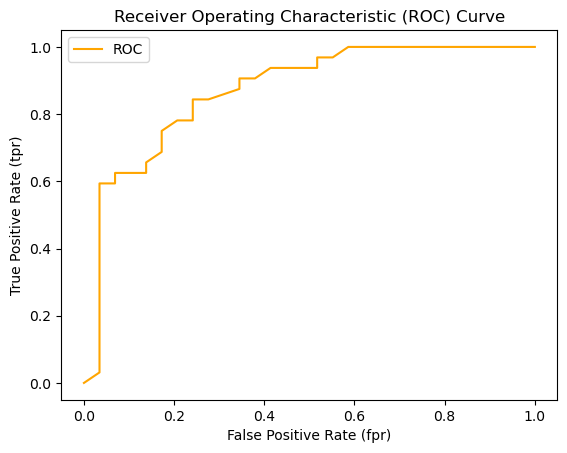

In [150]:
# Create a function to plot ROC plot (Receiver operating characteristic)
import matplotlib.pyplot as plt

def plot_roc_curve(fpr, tpr):
    """
    Plots a ROC curve given the false positive rate (fpr)
    and true positive (tpr) of a model.
    """
    # Plot ROC curve
    plt.plot(fpr, tpr, color="orange",label="ROC")
    # Plot line with no predictive power (baseline)
    # plt.plot([0, 1], [0, 1], color="darkblue", linestyle="--", label="Guessing")

    # Customize the plot
    plt.xlabel("False Positive Rate (fpr)")
    plt.ylabel("True Positive Rate (tpr)")
    plt.title("Receiver Operating Characteristic (ROC) Curve")
    plt.legend()
    plt.show()

plot_roc_curve(fpr, tpr)

In [149]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, y_probs_positive)

0.8701508620689655

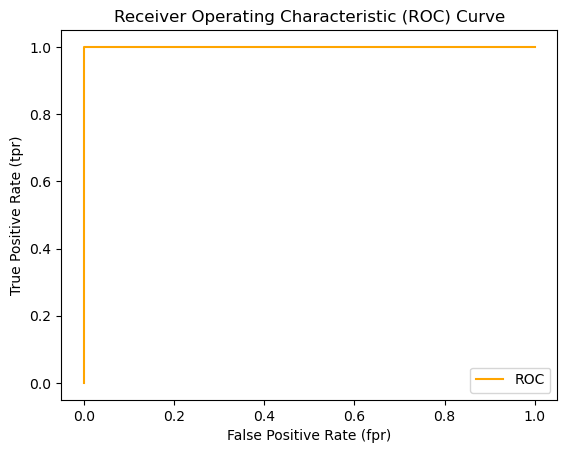

In [151]:
# Plot perfect ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_test)
plot_roc_curve(fpr, tpr)

In [152]:
# Perfect AUC score
roc_auc_score(y_test, y_test)

1.0

### Confusion matrix
A confusion matrix is a quick way to compare labels a model predicts and the actual labels it was supposed to predict.
In essence, giving you an idea of where the model is getting confused

In [153]:
from sklearn.metrics import confusion_matrix

y_preds = clf.predict(X_test)
confusion_matrix(y_test, y_preds)

array([[22,  7],
       [ 5, 27]], dtype=int64)

In [154]:
# Visualize confusion matrix with pd.crosstab()
pd.crosstab(y_test,
            y_preds,
            rownames=["Actual Labels"],
            colnames=["Predicted Labels"])

Predicted Labels,0,1
Actual Labels,,
0,22,7
1,5,27


In [157]:
# How to install a conda package into the current env from jupyter notebook
import sys
!conda install --yes --prefix {sys.prefix} seaborn

Retrieving notices: ...working... done
Channels:
 - defaults
Platform: win-64
Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\muhammad.rahman\Desktop\sample_project_1\env

  added / updated specs:
    - seaborn


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    seaborn-0.13.2             |  py312haa95532_0         714 KB
    ------------------------------------------------------------
                                           Total:         714 KB

The following NEW packages will be INSTALLED:

  seaborn            pkgs/main/win-64::seaborn-0.13.2-py312haa95532_0 



Preparing transaction: ...working... done
Verifying transaction: ...working... done
Executing transaction: ...working... done


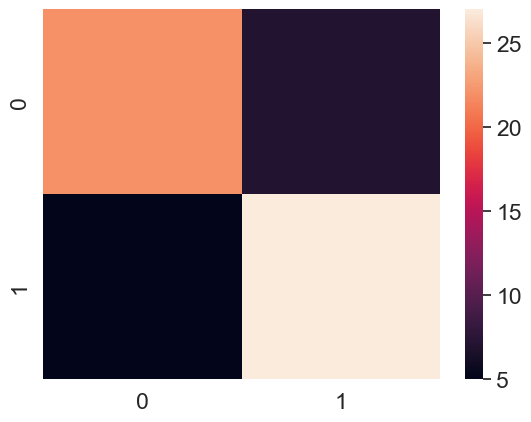

In [159]:
# Make confusion matrix more visual with seaborn's heatmap()
import seaborn as sns

# Set the font scale
sns.set(font_scale=1.5)

# Create a confusion matrix
conf_mat = confusion_matrix(y_test, y_preds)

# Plot it using Seaborn
sns.heatmap(conf_mat);



In [162]:
clf

RandomForestClassifier()

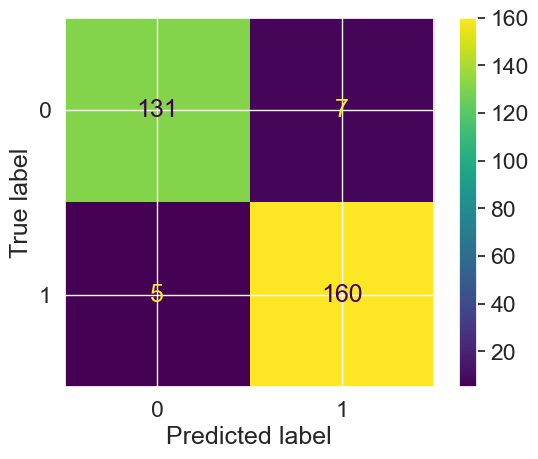

In [166]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(estimator=clf, X=X, y=y)

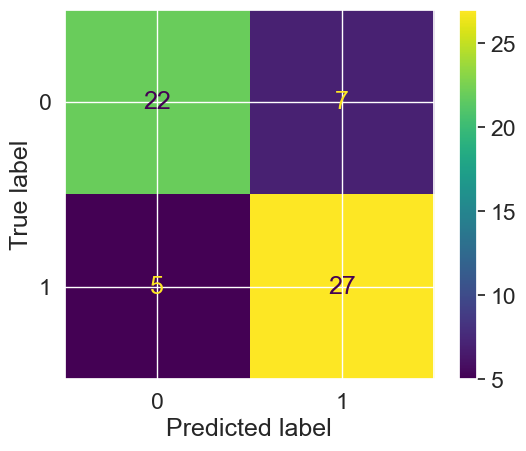

In [167]:
ConfusionMatrixDisplay.from_predictions(y_true = y_test,
                                        y_pred = y_preds);

## Classification report

In [169]:
from sklearn.metrics import classification_report

print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.81      0.76      0.79        29
           1       0.79      0.84      0.82        32

    accuracy                           0.80        61
   macro avg       0.80      0.80      0.80        61
weighted avg       0.80      0.80      0.80        61



In [173]:
# When does precision and recall become valuable
disease_true = np.zeros(10000)
disease_true[0] = 1 # Only one positive case

disease_preds = np.zeros(10000) # Model predicts every case as 0

pd.DataFrame(classification_report(disease_true,
                                   disease_preds,
                                   output_dict=True))

C:\Users\muhammad.rahman\Desktop\sample_project_1\env\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\muhammad.rahman\Desktop\sample_project_1\env\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\muhammad.rahman\Desktop\sample_project_1\env\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif

,0.0,1.0,accuracy,macro avg,weighted avg
precision,0.99990,0.0,0.9999,0.499950,0.99980
recall,1.00000,0.0,0.9999,0.500000,0.99990
f1-score,0.99995,0.0,0.9999,0.499975,0.99985
support,9999.00000,1.0,0.9999,10000.000000,10000.00000


To summarize:

* Accuracy is a good measure to start with if all classes are balanced (e.g. same amount of samples which are labelled with 0 or 1)
* Precision and recall become more important when classes are imbalanced.
* If false positive predictions are worse than false negatives, aim for higher precision.
* If false negative predictions are worse than false positives, aim for higher recall.

### 4.2.2 Regression model evaluation metrics

* R^2 (R-squared ) or coefficient of determination
* Mean Absolute Error (MAE)
* Mean Squared Error (MSE)

In [181]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

X = housing_df.drop("target",axis=1)
y = housing_df["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = RandomForestRegressor()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.8065734772187598

In [179]:
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [180]:
y_test.mean()

2.054569968507752

In [182]:
from sklearn.metrics import r2_score

# Fill an array with y_test mean
y_test_mean = np.full(len(y_test),y_test.mean())

In [183]:
y_test_mean[:10]

array([2.0550031, 2.0550031, 2.0550031, 2.0550031, 2.0550031, 2.0550031,
       2.0550031, 2.0550031, 2.0550031, 2.0550031])

In [184]:
r2_score(y_true = y_test,
         y_pred = y_test_mean)

0.0

R^2 Compares your models predictions to the mean of the targets. Values can range from negative infinity (a very poor model) to 1. For example, if all your model does is predict the mean of the targets, its R^2 value would be 0. And if your model perfectly predicts a range of numbers it's R^2 value would be 1. Higher is better.

In [185]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

X = housing_df.drop("target",axis=1)
y = housing_df["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = RandomForestRegressor()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.8065734772187598

In [ ]:
y_test_mean

Mean Absolute Error is the absolute of differences between predictions and actual values.
It gives an idea of how wrong our model prediction is.

In [187]:
# Using Mean Absolute Error
from sklearn.metrics import mean_absolute_error
y_pred = model.predict(X_test)

In [202]:
MAE = mean_absolute_error(y_true = y_test,
                    y_pred = y_pred)

In [195]:
df = pd.DataFrame(data={"actual values": y_test,
                        "predicted values": y_pred})
df["differences"] = df["actual values"] - df["predicted values"]
df.head()

,actual values,predicted values,differences
20046,0.47700,0.493840,-0.016840
3024,0.45800,0.754940,-0.296940
15663,5.00001,4.928596,0.071414
20484,2.18600,2.543160,-0.357160
9814,2.78000,2.331760,0.448240


In [198]:
# MAE using formulas and differences
np.abs(df["differences"]).mean()

0.32659871732073664

In [200]:
# MSE
from sklearn.metrics import mean_squared_error
mean_squared_error(y_true = y_test,
                   y_pred = y_pred)

0.2534678520824551

In [208]:
df["Squared differences"] = np.square(df["differences"])
df.head()

,actual values,predicted values,differences,Squared differences
20046,0.47700,0.493840,-0.016840,0.000284
3024,0.45800,0.754940,-0.296940,0.088173
15663,5.00001,4.928596,0.071414,0.005100
20484,2.18600,2.543160,-0.357160,0.127563
9814,2.78000,2.331760,0.448240,0.200919


In [204]:
# Calculate MSE by hand
squared = np.square(df["differences"])
squared.mean()

0.2534678520824551

In [210]:
df_large_error = df.copy()
df_large_error.iloc[0]["Squared differences"] = 16

C:\Users\muhammad.rahman\AppData\Local\Temp\ipykernel_22120\2878701570.py:2: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df_large_error.iloc[0]["Squared differences"] = 16


In [211]:
df_large_error

,actual values,predicted values,differences,Squared differences
20046,0.47700,0.493840,-0.016840,16.000000
3024,0.45800,0.754940,-0.296940,0.088173
15663,5.00001,4.928596,0.071414,0.005100
20484,2.18600,2.543160,-0.357160,0.127563
9814,2.78000,2.331760,0.448240,0.200919
...,...,...,...,...
15362,2.63300,2.220380,0.412620,0.170255
16623,2.66800,1.947760,0.720240,0.518746
18086,5.00001,4.836378,0.163632,0.026775
2144,0.72300,0.717820,0.005180,0.000027


In [213]:
df_large_error["Squared differences"].mean()

0.2573437523766412

In [214]:
df_large_error.iloc[1:100] = 20
df_large_error

,actual values,predicted values,differences,Squared differences
20046,0.47700,0.493840,-0.016840,16.000000
3024,20.00000,20.000000,20.000000,20.000000
15663,20.00000,20.000000,20.000000,20.000000
20484,20.00000,20.000000,20.000000,20.000000
9814,20.00000,20.000000,20.000000,20.000000
...,...,...,...,...
15362,2.63300,2.220380,0.412620,0.170255
16623,2.66800,1.947760,0.720240,0.518746
18086,5.00001,4.836378,0.163632,0.026775
2144,0.72300,0.717820,0.005180,0.000027


In [215]:
df_large_error["Squared differences"].mean()

0.7334180712088106

## 4.2.3 Using score parameter

In [44]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X = heart_disease.drop("target",axis=1)
y = heart_disease["target"]

clf = RandomForestClassifier()

In [45]:
np.random.seed()

# Cross validation accuracy
cv_acc = cross_val_score(clf, X, y, cv=5)
cv_acc

array([0.86885246, 0.8852459 , 0.80327869, 0.76666667, 0.78333333])

In [46]:
print(f"Score of Cross Validation is: {np.mean(cv_acc)*100:.2f}%")

Score of Cross Validation is: 82.15%


In [47]:
np.random.seed(42)
cv_precision = cross_val_score(clf, X, y, cv=5, scoring="precision")
print(f"Score of Cross Validation Precision is: {np.mean(cv_precision):.2f}")

Score of Cross Validation Precision is: 0.83


In [48]:
np.random.seed(42)
cv_recall = cross_val_score(clf, X, y, cv=5, scoring="recall")
print(f"Score of Cross Validation Recall is: {np.mean(cv_recall):.2f}")

Score of Cross Validation Recall is: 0.85


In [49]:
np.random.seed(42)
cv_f1 = cross_val_score(clf, X, y, cv=5, scoring="f1")
print(f"Score of Cross Validation Recall is: {np.mean(cv_f1):.2f}")

Score of Cross Validation Recall is: 0.84


In [50]:
# Apply the method to Regressor
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

X = housing_df.drop("target",axis=1)
y = housing_df["target"]

model = RandomForestRegressor()

In [51]:
np.random.seed(42)
cv_r2 = cross_val_score(model,X, y, cv=5, scoring="r2")
print(f"Cross Validation r2 score is: {np.mean(cv_r2):.2f}")

Cross Validation r2 score is: 0.65


In [54]:
import numpy as np
np.random.seed(42)
cv_mae = cross_val_score(model, X, y, cv=5, scoring="neg_mean_absolute_error")
np.mean(cv_mae)

-0.46620501732073655

In [55]:
np.random.seed(42)
cv_mse = cross_val_score(model, X, y, cv=5, scoring="neg_mean_squared_error")
np.mean(cv_mse)

-0.4301865790173885

## 4.3 Different evaluation metrics as sklearn functions (using sklearn.metrics)

In [29]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

np.random.seed(42)

X = heart_disease.drop("target",axis=1)
y = heart_disease["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

y_pred = clf.predict(X_test)

clf = RandomForestClassifier()
clf.fit(X_train, y_train)

RandomForestClassifier()

In [30]:
print("Classifier Metrics on the test set")
print(f"Accuracy: {accuracy_score(y_test, y_pred)*100:.2f}%")
print(f"Precision: {precision_score(y_test, y_pred):.2f}")
print(f"Recall: {recall_score(y_test,y_pred):.2f}")
print(f"f1_score: {f1_score(y_test,y_pred):.2f}")

Classifier Metrics on the test set
Accuracy: 98.36%
Precision: 1.00
Recall: 0.97
f1_score: 0.98


In [61]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

np.random.seed(42)

X = housing_df.drop("target",axis=1)
y = housing_df["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = RandomForestRegressor()
model.fit(X_train,y_train)
y_preds = model.predict(X_test)


KeyError: "['target'] not found in axis"

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
179,57,1,0,150,276,0,0,112,1,0.6,1,1,1,0
228,59,1,3,170,288,0,0,159,0,0.2,1,0,3,0
111,57,1,2,150,126,1,1,173,0,0.2,2,1,3,1
246,56,0,0,134,409,0,0,150,1,1.9,1,2,3,0
60,71,0,2,110,265,1,0,130,0,0.0,2,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,50,1,2,140,233,0,1,163,0,0.6,1,1,3,0
71,51,1,2,94,227,0,1,154,1,0.0,2,1,3,1
106,69,1,3,160,234,1,0,131,0,0.1,1,1,2,1
270,46,1,0,120,249,0,0,144,0,0.8,2,0,3,0


In [81]:
print("Regressor metrics on the test set")
print(f"r2_score: {r2_score(y_test,y_preds):.2f}")
print(f"mae: {mean_absolute_error(y_test, y_preds):.2f}")
print(f"mse: {mean_squared_error(y_test,y_preds):.2f}")

Regressor metrics on the test set
r2_score: 0.81
mae: 0.33
mse: 0.25


## Improving a model

First predictions = baseline predictions.
First model = baseline model.

Hyperparameters vs parameters
* Parameters = model find these patterns in data
* Hyperparameters = settings on a model we can adjust to (potentially improve) its ability to find patterns

Three ways to adjust hyperparameters
* By hand
* Randomly with RandomSearchCV
* Exhaustively with GridSearchCV

### Tuning hyperparameters by hand

In [64]:
def evaluate_preds(y_true, y_predict):
    """
    Performs evaluation comparison on y_true labels vs y_pred labels
    on a classification.
    """
    accuracy = accuracy_score(y_true, y_preds)
    precision = precision_score(y_true, y_preds)
    recall = recall_score(y_true, y_preds)
    f1 = f1_score(y_true, y_preds)
    metrics_dict = {"Accuracy": round(accuracy, 2),
                    "Precision": round(precision,2),
                    "Recall": round(recall,2),
                    "f1 score": round(f1,2)}
    print(f"Acc: {accuracy * 100:.2f}%")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"f1 score: {f1:.2f}")

    return metrics_dict

In [65]:
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

# Shuffle the dataset
heart_disease_shuffled = heart_disease.sample(frac=1)

# Define X & y
X = heart_disease_shuffled.drop("target",axis=1)
y = heart_disease_shuffled["target"]

# Split the data into train, validation, and test
train_split = round(0.7 * len(heart_disease_shuffled))
valid_split = round(train_split + 0.15 * len(heart_disease_shuffled))
X_train, y_train = X[:train_split], y[:train_split]
X_valid, y_valid = X[train_split:valid_split], y[train_split:valid_split]
X_test, y_test = X[valid_split:], y[valid_split:]


clf = RandomForestClassifier()
clf.fit(X_train, y_train)

# Make predictions
y_preds = clf.predict(X_valid)

# Evaluate the classifier on validation set
baseline_metrics = evaluate_preds(y_valid, y_preds)
baseline_metrics

Acc: 82.22%
Precision: 0.81
Recall: 0.88
f1 score: 0.85


{'Accuracy': 0.82, 'Precision': 0.81, 'Recall': 0.88, 'f1 score': 0.85}

In [66]:
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [67]:
np.random.seed(42)

# Create second classifier with different hyperparameters
clf_2 = RandomForestClassifier(n_estimators=500)
clf_2.fit(X_train,y_train)

# Make predictions with different hyperparameters
y_pred_2 = clf.predict(X_valid)
clf_2_metrics = evaluate_preds(y_valid, y_pred_2)



Acc: 82.22%
Precision: 0.81
Recall: 0.88
f1 score: 0.85


In [104]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split

In [105]:
heart_disease = pd.read_csv("https://raw.githubusercontent.com/mrdbourke/zero-to-mastery-ml/master/data/heart-disease.csv")

# Split into X & y
X = heart_disease.drop("target", axis =1)
y = heart_disease["target"]

# Split into train & test
np.random.seed(42) # seed for reproducibility
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [106]:
def evaluate_preds(y_true, y_preds):
    """
    Performs evaluation comparison on y_true labels vs. y_pred labels
    on a classification.
    """
    accuracy = accuracy_score(y_true, y_preds)
    precision = precision_score(y_true, y_preds)
    recall = recall_score(y_true, y_preds)
    f1 = f1_score(y_true, y_preds)
    metric_dict = {"accuracy": round(accuracy, 2),
                   "precision": round(precision, 2),
                   "recall": round(recall, 2),
                   "f1": round(f1, 2)}
    print(f"Acc: {accuracy * 100:.2f}%")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1 score: {f1:.2f}")
    
    return metric_dict

In [107]:
np.random.seed(42)

# Make & fit baseline model
clf = RandomForestClassifier()
clf.fit(X_train, y_train)

# Make baseline predictions
y_preds = clf.predict(X_test)

# Evaluate the classifier on validation set
baseline_metrics = evaluate_preds(y_test, y_preds)

Acc: 83.61%
Precision: 0.84
Recall: 0.84
F1 score: 0.84


## 5.2 RandomizedSearchCV

In [108]:
from sklearn.model_selection import RandomizedSearchCV

# Setup the parameters grid
grid = {"n_estimators": [10, 100, 200, 500, 1000, 1200],
        "max_depth": [None, 5, 10, 20, 30],
        "max_features": ["auto", "sqrt"],
        "min_samples_split": [2, 4, 6],
        "min_samples_leaf": [1, 2, 4]}

# Instantiate RandomForestClassifier
clf = RandomForestClassifier(n_jobs=1)

# Setup RandomizedSearchCV
rs_clf = RandomizedSearchCV(estimator=clf,
                            param_distributions=grid, 
                            n_iter=10, # number of models to try
                            cv=5,
                            verbose=2,
                            random_state=42, # set random_state to 42 for reproducibility
                            refit=True) # set refit=True (default) to refit the best model on the full dataset 

# Fit the RandomizedSearchCV version of clf
rs_clf.fit(X_train, y_train) # 'rs' is short for RandomizedSearch

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimato

C:\Users\muhammad.rahman\Desktop\sample_project_1\env\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
15 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\muhammad.rahman\Desktop\sample_project_1\env\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\muhammad.rahman\Desktop\sample_project_1\env\Lib\site-packages\sklearn\base.py", line 1467, in wrapper
    estimator._validate_params()
  File "C:\Users\muhammad.rahman\Desktop\sample_project_1\env\Lib\site-packages\sklearn\base.py", l

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=1),
                   param_distributions={'max_depth': [None, 5, 10, 20, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 4, 6],
                                        'n_estimators': [10, 100, 200, 500,
                                                         1000, 1200]},
                   random_state=42, verbose=2)

In [109]:
# Check best parameters of RandomizedSearchCV
rs_clf.best_params_

{'n_estimators': 100,
 'min_samples_split': 2,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': None}

In [110]:
# Evaluate RandomizedSearch model
rs_y_preds = rs_clf.predict(X_test)

# Evaluate the classifier on validation set
rs_metrics = evaluate_preds(y_test, rs_y_preds)

Acc: 83.61%
Precision: 0.84
Recall: 0.84
F1 score: 0.84


## 5.3 GridSearchCV

In [111]:
from sklearn.model_selection import GridSearchCV

# Setup grid-2 (refined version of grid)
grid_2 = {'n_estimators': [50, 100, 150],
          'max_depth': [30, None],
          'max_features': ['auto', 'sqrt'],
          'min_samples_split': [2],
          'min_samples_leaf': [1, 2, 4]}

# Instantiate RandomForestClassifier
clf = RandomForestClassifier(n_jobs=1)

# Setup GridSearchCV
gs_clf = GridSearchCV(estimator=clf,
                      param_grid=grid_2, 
                      cv=5,
                      verbose=2,
                      refit=True) # set refit=True (default) to refit the best model on the full dataset

# Fit the GridSearchCV version of clf
gs_clf.fit(X_train, y_train) # 'gs' is short for GridSearch

Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV] END max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; to

C:\Users\muhammad.rahman\Desktop\sample_project_1\env\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
90 fits failed out of a total of 180.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
90 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\muhammad.rahman\Desktop\sample_project_1\env\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\muhammad.rahman\Desktop\sample_project_1\env\Lib\site-packages\sklearn\base.py", line 1467, in wrapper
    estimator._validate_params()
  File "C:\Users\muhammad.rahman\Desktop\sample_project_1\env\Lib\site-packages\sklearn\base.py", 

GridSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=1),
             param_grid={'max_depth': [30, None],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2],
                         'n_estimators': [50, 100, 150]},
             verbose=2)

In [112]:
# Find best parameters of GridSearchCV
gs_clf.best_params_

{'max_depth': 30,
 'max_features': 'sqrt',
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 100}

In [113]:
# Evaluate GridSearchCV model
gs_y_preds = gs_clf.predict(X_test)

# Evaluate the classifier on validation set
gs_metrics = evaluate_preds(y_test, gs_y_preds)

Acc: 86.89%
Precision: 0.88
Recall: 0.88
F1 score: 0.88


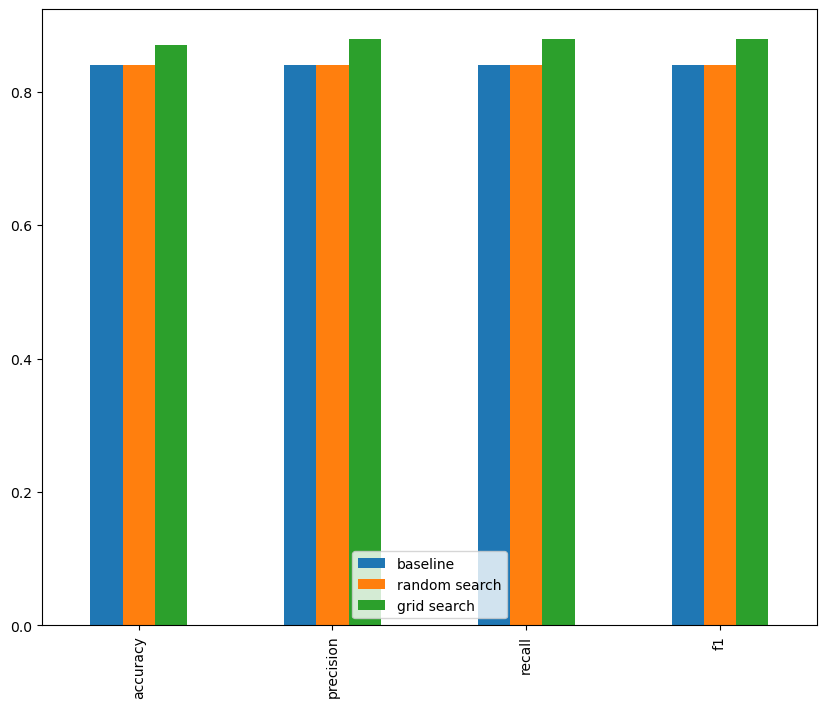

In [114]:
compare_metrics = pd.DataFrame({"baseline": baseline_metrics,
                                "random search": rs_metrics,
                                "grid search": gs_metrics})

compare_metrics.plot.bar(figsize=(10, 8));

## 6. Saving and loading trained machine learning models

In [122]:
import pickle

# Save existing model to file
pickle.dump(gs_clf, open("GridSearch_Model_1.pkl", "wb"))

In [124]:
# Load a saved model
loaded_pickle_model = pickle.load(open("GridSearch_Model_1.pkl","rb"))
loaded_pickle_model

GridSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=1),
             param_grid={'max_depth': [30, None],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2],
                         'n_estimators': [50, 100, 150]},
             verbose=2)

In [125]:
# Using joblib
from joblib import dump, load
dump(gs_clf, filename="GridSearch_Model_1.joblib")

['GridSearch_Model_1.joblib']

In [126]:
loaded_job_model = load(filename="GridSearch_Model_1.joblib")

# 7. Put the steps all together

In [127]:
data = pd.read_csv("car-sales-missing-data.csv")
data

,Make,Colour,Odometer,Doors,Price
0,Toyota,White,150043.0,4.0,"$4,000"
1,Honda,Red,87899.0,4.0,"$5,000"
2,Toyota,Blue,NaN,3.0,"$7,000"
3,BMW,Black,11179.0,5.0,"$22,000"
4,Nissan,White,213095.0,4.0,"$3,500"
5,Toyota,Green,NaN,4.0,"$4,500"
6,Honda,NaN,NaN,4.0,"$7,500"
7,Honda,Blue,NaN,4.0,NaN
8,Toyota,White,60000.0,NaN,NaN
9,NaN,White,31600.0,4.0,"$9,700"


In [128]:
data.dtypes

Make         object
Colour       object
Odometer    float64
Doors       float64
Price        object
dtype: object

In [129]:
data.isna().sum()

Make        1
Colour      1
Odometer    4
Doors       1
Price       2
dtype: int64

In [132]:
# Getting data ready
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

# Modelling
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV

# Setup random seed
import numpy as np
np.random.seed(42)

# Import data and drop rows with missing labels
data = pd.read_csv("car-sales-extended-missing-data.csv")
data.dropna(subset=["Price"], inplace=True)

# Define different features and transformer pipeline
categorical_features = ["Make", "Colour"]
categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="constant", fill_value="missing")),
    ("onehot", OneHotEncoder(handle_unknown="ignore"))])

door_feature = ["Doors"]
door_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="constant", fill_value=4))
])

numeric_features = ["Odometer (KM)"]
numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="mean"))
])

# Setup preprocessing steps (fill missing values, then convert to numbers)
preprocessor = ColumnTransformer(
                    transformers=[
                        ("cat", categorical_transformer, categorical_features),
                        ("door", door_transformer, door_feature),
                        ("num", numeric_transformer, numeric_features)
                    ])

# Creating a preprocessing and modelling pipeline
model = Pipeline(steps=[("preprocessor", preprocessor),
                        ("model", RandomForestRegressor())])

# Split data
X = data.drop("Price", axis=1)
y = data["Price"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Fit and score the model
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.22188417408787875

In [139]:
# Use GridSearchCV with our regression Pipeline
from sklearn.model_selection import GridSearchCV

pipe_grid = {
    "preprocessor__num__imputer__strategy": ["mean", "median"],
    "model__n_estimators": [100, 1000],
    "model__max_depth": [None, 5],
    "model__max_features": ["sqrt"],
    "model__min_samples_split": [2, 4]    
}

gs_model = GridSearchCV(model, pipe_grid, cv=5, verbose=2)
gs_model.fit(X_train, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.1s
[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.1s
[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.1s
[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.1s
[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.1s
[CV] END model__max_depth=None, model__max_features=sqrt, model__min_sampl

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('cat',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(fill_value='missing',
                                                                                                        strategy='constant')),
                                                                                         ('onehot',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['Make',
                                                                          'Colour']),
                                                                        ('door',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(fill_value=4,
                                                                                                        strategy='constant'))]),
                                                                         ['Doors']),
                                                                        ('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer())]),
                                                                         ['Odometer '
                                                                          '(KM)'])])),
                                       ('model', RandomForestRegressor())]),
             param_grid={'model__max_depth': [None, 5],
                         'model__max_features': ['sqrt'],
                         'model__min_samples_split': [2, 4],
                         'model__n_estimators': [100, 1000],
                         'preprocessor__num__imputer__strategy': ['mean',
                                                                  'median']},
             verbose=2)

In [140]:
gs_model.score(X_test,y_test)

0.2848784564026805